$\textbf{Lab 6 (LHC)}$

In [49]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 


(array([1.0000e+00, 5.0000e+00, 1.2000e+01, 3.4000e+01, 7.5000e+01,
        2.0300e+02, 3.8700e+02, 7.5500e+02, 1.4490e+03, 2.6470e+03,
        4.4130e+03, 7.3510e+03, 1.1703e+04, 1.7420e+04, 2.4666e+04,
        3.3123e+04, 4.2642e+04, 5.2682e+04, 6.2291e+04, 6.9757e+04,
        7.6124e+04, 7.9141e+04, 7.9524e+04, 7.6098e+04, 7.0976e+04,
        6.2374e+04, 5.4040e+04, 4.4628e+04, 3.5628e+04, 2.7174e+04,
        2.0101e+04, 1.4448e+04, 1.0138e+04, 6.8040e+03, 4.4750e+03,
        2.8120e+03, 1.6690e+03, 9.9200e+02, 5.5900e+02, 3.1900e+02,
        1.8800e+02, 7.9000e+01, 4.8000e+01, 2.8000e+01, 7.0000e+00,
        7.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 56.  ,  57.98,  59.96,  61.94,  63.92,  65.9 ,  67.88,  69.86,
         71.84,  73.82,  75.8 ,  77.78,  79.76,  81.74,  83.72,  85.7 ,
         87.68,  89.66,  91.64,  93.62,  95.6 ,  97.58,  99.56, 101.54,
        103.52, 105.5 , 107.48, 109.46, 111.44, 113.42, 115.4 , 117.38,
        119.36, 121.34, 123.32

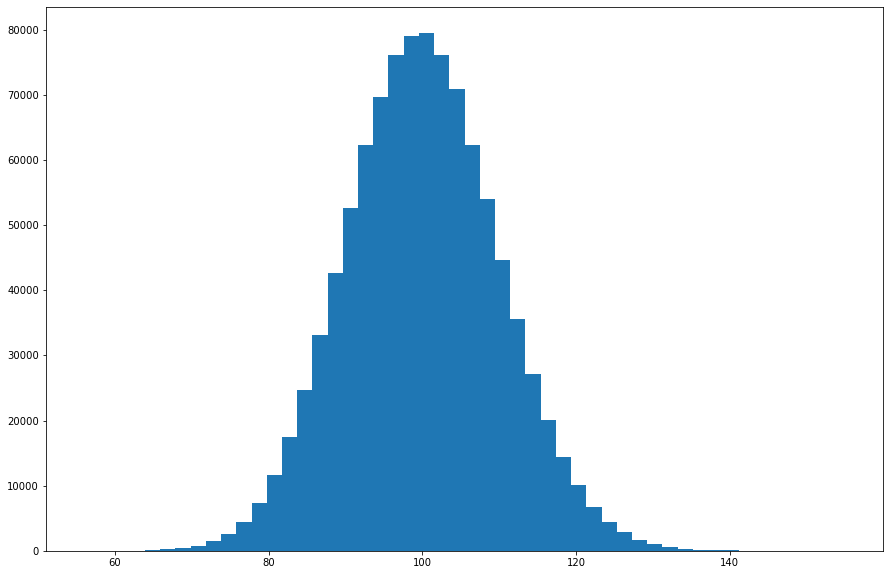

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
mean = 100;
bkgd = stats.poisson.rvs(100,loc=0, size = 1000000)
ax.hist(bkgd, bins = 50)

$\textbf{Problem 1}$

The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]



In [51]:
prob = stats.norm.cdf(5)
threshold = stats.poisson.ppf(prob, mean)
print("The 5-sigma sensitivity threshold for a poisson distribution of mean " + str(mean) + " is " + str(threshold))

The 5-sigma sensitivity threshold for a poisson distribution of mean 100 is 154.0


$\textbf{Problem 2}$

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

For some reason, anything higher than 8 sigma is rounded to infinity, so I'll just use the 8 sigma threshold here for simplicity. 

In [52]:
prob = stats.norm.cdf(8)
threshold = stats.poisson.ppf(prob, mean)
threshold

190.0

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

As shown above, 8 sigma is ~190, so I'll inject that signal into our background distribution. Problem says inject many times, so for simplicity I'll just explicitly add that signal to every background value.

In [53]:
data2 = np.array(bkgd) + 190

Text(0.5, 1.0, 'Histogram of values for true signal = 190.0')

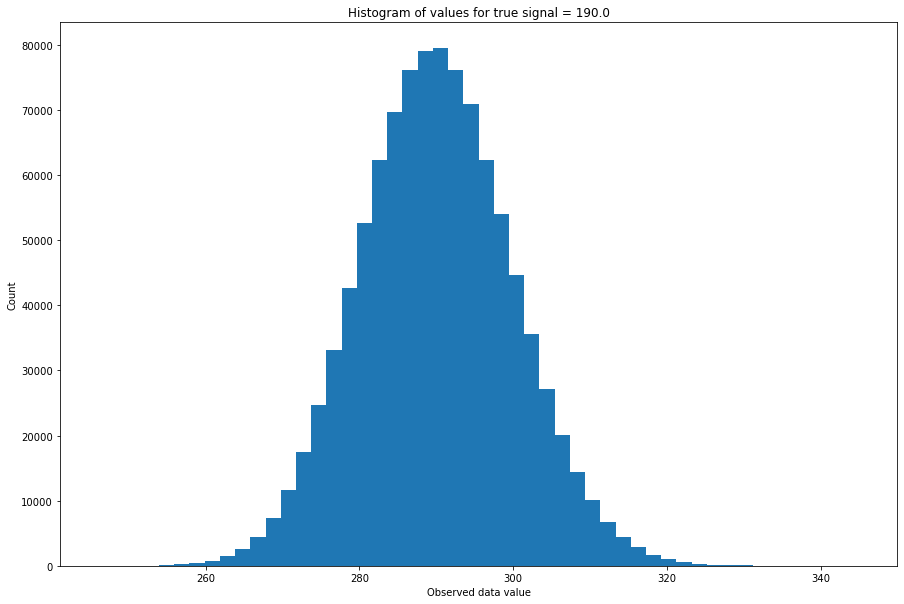

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.hist(data2, bins = 50)
ax.set_xlabel("Observed data value")
ax.set_ylabel("Count")
ax.set_title("Histogram of values for true signal = " + str(threshold))

As we see, injecting our signal of ~190 simply shifted our distribution to the right by 190, as expected. Since our data = bkgd + signal, we expect all our data values to increase by the signal value if we inject the same value a sufficient amount of times. Thus, the above histogram is simply showing our observed data value, given that our observation is our background that has a signal injected in it many times. 

$\textbf{b)}$ Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

In [56]:
data2.min()

246

As we see above, the minimum value of our distribution is in fact larger than the true signal of 190. Thus, our observed signal is biased because we expect our observed data value to always be greater than the true signal. In the above graph, it also appears very close to symmetric about the mean.

$\textbf{Problem 3}$
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above $5\sigma$ ($30\sigma$ or more). You will want to follow the work you did for Homework 5 very closely.

$\textbf{a)}$ Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

Some weird rounding here makes it so I can't check what a 30 sigma threshold would be. I'll approximate it below 

In [57]:
prob_array = [stats.norm.cdf(0), stats.norm.cdf(1), stats.norm.cdf(2) ,stats.norm.cdf(3), 
              stats.norm.cdf(4), stats.norm.cdf(5), stats.norm.cdf(6), stats.norm.cdf(7), 
              stats.norm.cdf(8), stats.norm.cdf(9)]

threshold_array = stats.poisson.ppf(prob_array, mean)
threshold_array

array([100., 110., 120., 131., 142., 154., 166., 178., 190.,  inf])

It looks like every additional sigma value is an increase of ~12, so since 8 sigma is 190, 30 sigma should be (30-8) times 12 higher or so, or approximately 364. This estimation might not be valid for higher sigma values, but I'll use that value in the following problem. As with the homework, I opted to inject a signal with uniform distribution.

Text(0.5, 0, 'Observed data, $P(d|s)$')

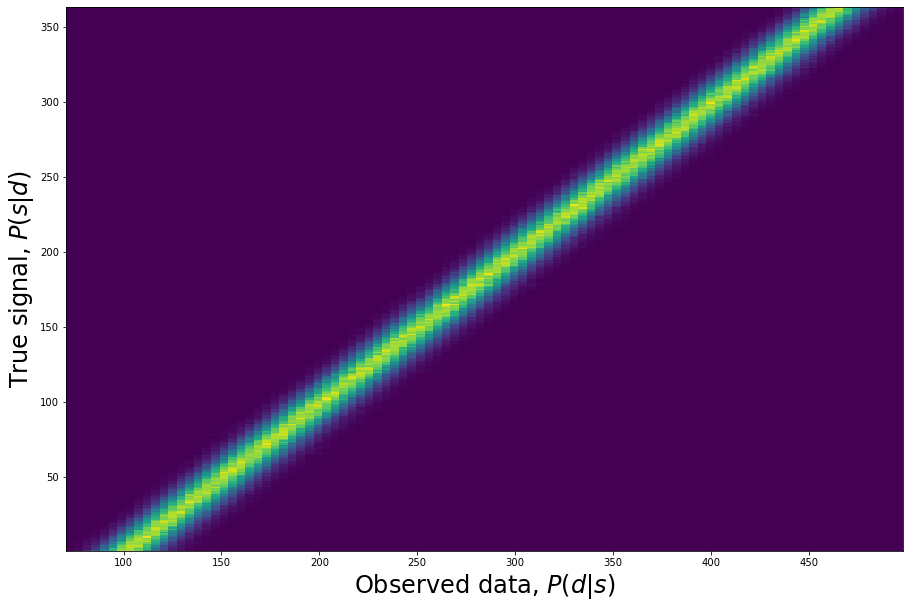

In [78]:
signal = stats.uniform.rvs(loc=0,scale=364, size = 1000000)
data = bkgd + signal

signaledges = np.linspace(signal.min(),signal.max(),364)
dataedges = np.linspace(data.min(), data.max(),100)

Psd, temp, temp2 = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

plt.figure(figsize=(15,10))
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

$\textbf{b)}$ For the same injected signal power as in problem 2, show that you get the same answer.

Below, we see that for the horizontal slice for injected signal = 190, we get an (approximately) equivalent distribution centered on 290.

In [82]:
#closest value to 190 for approximation purposes
signalcenters[189]

190.02205694989

Text(0.5, 0, 'Observed data, $P(d|s)$')

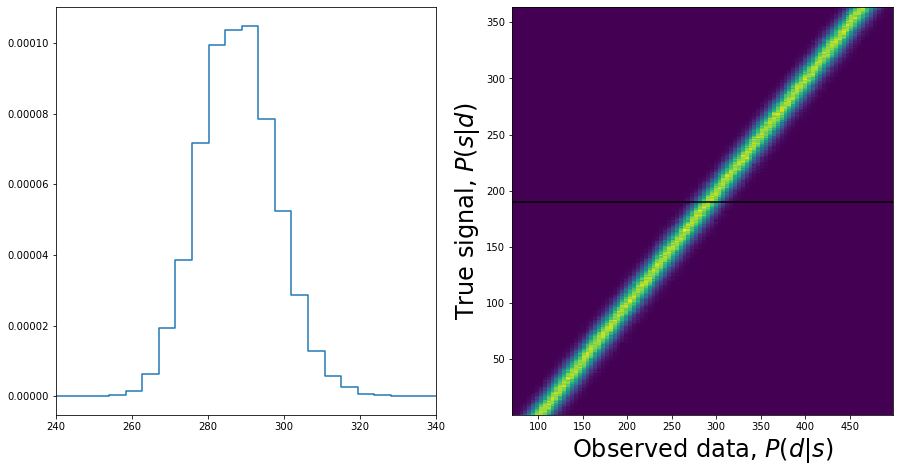

In [85]:
fig,ax=plt.subplots(1,2,figsize=(15,7.5))
ax[0].step(datacenters, Psd.transpose()[189])
ax[0].set_xlim(240, 340)
ax[1].pcolormesh(datacenters,signalcenters,Psd.T)
ax[1].hlines(signalcenters[189], datacenters.min(), datacenters.max());
ax[1].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[1].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)

$\textbf{c)}$ Now reverse the problem, select an observed data value (pick something quite a bit stronger than $5\sigma$) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

As with homework 5, we expect our histogram to be a "slice" of the data (vertical line in this case), representing the probability of measuring some data value for a given true signal (190 in this case).

In [109]:
#arbitrarily chosen, but well above 5 sigma.
datacenters[79]

415.3890134476623

Text(0.5, 0, 'Observed data, $P(d|s)$')

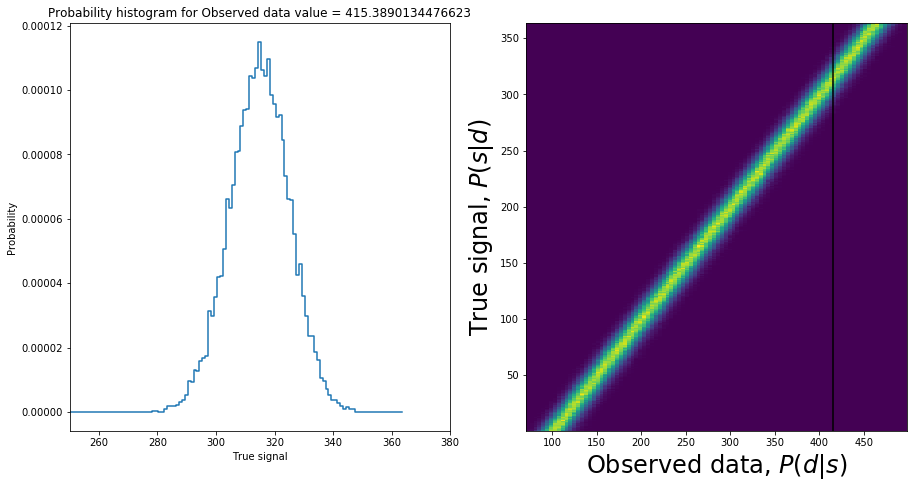

In [112]:
fig,ax=plt.subplots(1,2,figsize=(15,7.5))
ax[0].step(signalcenters, Psd[79])
ax[0].set_xlim(250, 380)
ax[0].set_xlabel("True signal")
ax[0].set_ylabel("Probability")
ax[0].set_title("Probability histogram for Observed data value = " + str(datacenters[79]))
ax[1].pcolormesh(datacenters,signalcenters,Psd.T)
ax[1].vlines(datacenters[79], signalcenters.min(), signalcenters.max());
ax[1].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[1].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)

As we saw in HW 5, we get a cutoff at the upper limit for true signal, as we set up signal to only go up to 364, or approximately 30 sigma originally.

$\textbf{d)}$ For your observed signal, what is the $1\sigma$ uncertainty on the true signal strength?

In the problem setup, we know that our background is a poisson distribution with mean 100, that is (approximately) symmetric. Since our chosen observed value was $\approx 415$, the true signal is found with data = bkgd + signal, so our true signal mean is approximately 315. Now, it's approximately symmetric, so we expect half of the probability to be left of the mean, and half of the probability to be to the right of the mean. Since we are interested in 1 sigma uncertainty, we can look at 0.5 sigma uncertainty to the left, and 0.5 sigma uncertainty to the right, i.e a 1 sigma uncertainty range. From lecture, we see that this is essentially just integrating +34% to find the upper value, and integrating -34% to find the lower value for a normal distribution.

Conveniently for us, however, the standard deviation of a 100 mean poisson distribution is just:

In [197]:
stats.poisson.std(100, 0)

10.0

So, our 1 sigma uncertainty range is $\approx$ (305, 325)

$\textbf{e)}$

Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

In [199]:
data.max()

500.4490371160804

As we can see, our data here is biased because the true signals (which reach a maximum at 364) are always less than the observed data value. Additionally, since we utilize a sufficiently large array size, and our poisson distribution for our background has a mean of 100 (which is relatively wide), we expect it to be approximately symmetric. 